In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
malaria = pd.read_csv('malaria_prediction.csv')

In [3]:
malaria.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
0,0,Male,yes,no,no,no,no,yes,no,no,no,no,yes,no,yes,yes,no,no
1,1,Male,no,no,yes,yes,yes,no,no,no,no,no,yes,no,no,no,no,no
2,0,Female,yes,no,no,yes,no,yes,no,yes,yes,no,no,yes,yes,no,no,no
3,1,Female,yes,yes,yes,no,yes,no,no,no,no,yes,yes,yes,yes,no,yes,no
4,1,Female,yes,yes,yes,no,yes,no,no,yes,yes,yes,yes,yes,no,no,no,no


In [4]:
malaria.shape

(1000, 18)

In [37]:
malaria.describe()

,age,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.512000,0.742000,0.564000,0.346000,0.524000,0.714000,0.430000,0.10100,0.345000,0.361000,0.354000,0.657000,0.544000,0.839000,0.246000,0.156000,0.323000
std,0.500106,0.437753,0.496135,0.475931,0.499674,0.452115,0.495323,0.30148,0.475606,0.480531,0.478448,0.474949,0.498309,0.367715,0.430894,0.363037,0.467857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
values = {"fever":{"no":0, "yes":1},"cold":{"no":0, "yes":1},"rigor":{"no":0, "yes":1},"fatigue":{"no":0, "yes":1},
          "headace":{"no":0, "yes":1},"bitter_tongue":{"no":0, "yes":1},"vomitting":{"no":0, "yes":1},
          "diarrhea":{"no":0, "yes":1},"Convulsion":{"no":0, "yes":1},"Anemia":{"no":0, "yes":1},"jundice":{"no":0, "yes":1},
          "cocacola_urine":{"no":0, "yes":1},"hypoglycemia":{"no":0, "yes":1},"prostraction":{"no":0, "yes":1},
          "hyperpyrexia":{"no":0, "yes":1},"hyperpyrexia":{"no":0, "yes":1},"severe_maleria":{"no":0, "yes":1}}

malaria.replace(values,inplace=True)

In [6]:
malaria.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_maleria
0,0,Male,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0
1,1,Male,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
2,0,Female,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
3,1,Female,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1,0
4,1,Female,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,0


In [7]:
y = malaria['severe_maleria']

In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    1
999    0
Name: severe_maleria, Length: 1000, dtype: int64

In [9]:
new_malaria = malaria.drop('severe_maleria', axis=1)

In [10]:
new_malaria.head()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia
0,0,Male,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
1,1,Male,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
2,0,Female,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0
3,1,Female,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1
4,1,Female,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0


In [11]:
new_malaria = pd.get_dummies(new_malaria)

In [12]:
new_malaria = new_malaria.drop('age', axis=1)

In [13]:
new_malaria.head()

,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,sex_Female,sex_Male
0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0
3,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1,1,0
4,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0


In [14]:
print(malaria.groupby('severe_maleria').size())

severe_maleria
0    677
1    323
dtype: int64


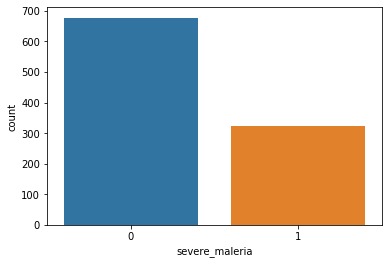

In [57]:
import seaborn as sns

sns.countplot(malaria['severe_maleria'],label="Count")

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_malaria, y, test_size=0.25, random_state=0)

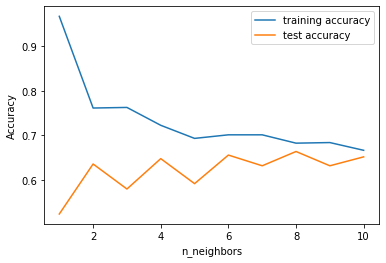

In [17]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [18]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.65


In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.667
Test set accuracy: 0.708


In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.667
Test set accuracy: 0.708


In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=20).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Training set accuracy: 0.667
Test set accuracy: 0.708


In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.968
Accuracy on test set: 0.596


In [23]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.723
Accuracy on test set: 0.692


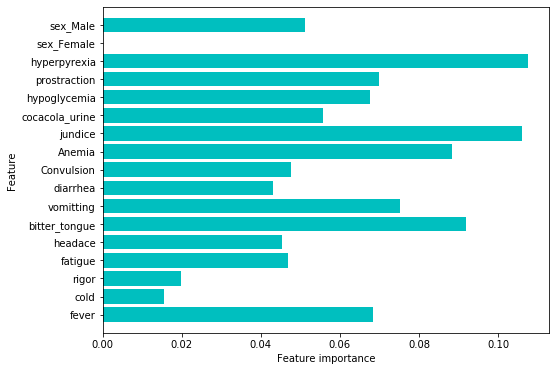

In [49]:
malaria_features = [x for i,x in enumerate(new_malaria.columns) if i!=17]
def plot_feature_importances_malaria(model):
    plt.figure(figsize=(8,6))
    n_features = 17
    plt.barh(range(n_features), model.feature_importances_, align='center',color="c")
    plt.yticks(np.arange(n_features), malaria_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_malaria(tree)
plt.savefig('feature_importance')

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.968
Accuracy on test set: 0.636


In [51]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.667
Accuracy on test set: 0.708


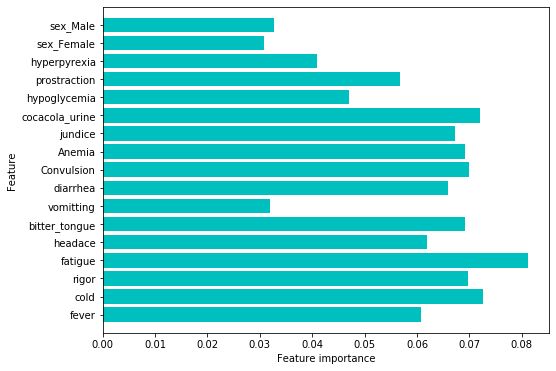

In [52]:
plot_feature_importances_malaria(rf)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.720
Accuracy on test set: 0.688


In [54]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.667
Accuracy on test set: 0.708


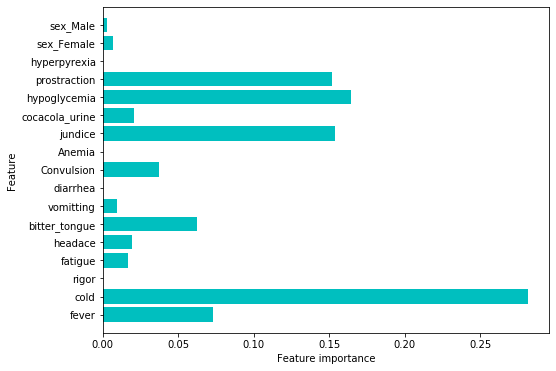

In [55]:
plot_feature_importances_malaria(gb1)

In [31]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.67
Accuracy on test set: 0.71
